# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [526]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import (ColumnTransformer, make_column_selector as selector)
from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler
)
from sklearn.datasets import load_digits, fetch_20newsgroups
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer
)

In [527]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [528]:
countries = pd.read_csv("countries.csv")

In [529]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [530]:
# Sua análise começa aqui.
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    object 
 5   Coastline_ratio   227 non-null    object 
 6   Net_migration     224 non-null    object 
 7   Infant_mortality  224 non-null    object 
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    object 
 10  Phones_per_1000   223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    object 
 16  Deathrate         223 non-null    object 
 1

In [531]:
#Frequencia de valores unicos
countries['Climate'].value_counts()

2      111
3       48
1       29
1,5      8
4        6
2,5      3
Name: Climate, dtype: int64

In [532]:
#Colunas para correcao de tipo
cols_to_float = ["Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"]

#Formas de conversao to_numeric
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html 
#countries[cols_to_float] = countries[cols_to_float].apply(pd.to_numeric)

#astype
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
#countries.Pop_density.str.replace(',','.').astype(float)

countries[cols_to_float] = countries[cols_to_float].apply(lambda s: s.str.replace(',','.').astype(float))

countries[cols_to_float]


,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,48.0,0.00,23.06,163.07,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,124.6,1.26,-4.93,21.52,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,13.8,0.04,-0.39,31.00,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,290.4,58.29,-20.71,9.27,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,152.1,0.00,6.60,4.05,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,419.9,0.00,2.98,19.62,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,1.0,0.42,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,40.6,0.36,0.00,61.50,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,15.3,0.00,0.00,88.29,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [533]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    float64
 5   Coastline_ratio   227 non-null    float64
 6   Net_migration     224 non-null    float64
 7   Infant_mortality  224 non-null    float64
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    float64
 10  Phones_per_1000   223 non-null    float64
 11  Arable            225 non-null    float64
 12  Crops             225 non-null    float64
 13  Other             225 non-null    float64
 14  Climate           205 non-null    float64
 15  Birthrate         224 non-null    float64
 16  Deathrate         223 non-null    float64
 1

In [534]:
df_info_nan = pd.DataFrame({'dtypes': countries.dtypes,
                            'total_nan': countries.isna().sum(), 
                            'perc': countries.isna().sum()/len(countries)})
df_info_nan

,dtypes,total_nan,perc
Country,object,0,0.000000
Region,object,0,0.000000
Population,int64,0,0.000000
Area,int64,0,0.000000
Pop_density,float64,0,0.000000
Coastline_ratio,float64,0,0.000000
Net_migration,float64,3,0.013216
Infant_mortality,float64,3,0.013216
GDP,float64,1,0.004405
Literacy,float64,18,0.079295


In [535]:
#Listagem de linhas com pelo menos x colunas nan
countries[countries.isna().sum(axis=1) > 3]

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,NaN,877.7,0.00,0.0,100.00,NaN,10.74,9.31,NaN,NaN,NaN
80,Greenland,NORTHERN AMERICA,56361,2166086,0.0,2.04,-8.37,15.82,20000.0,NaN,448.9,0.00,0.0,100.00,1.0,15.93,7.84,NaN,NaN,NaN
85,Guernsey,WESTERN EUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3.0,8.81,10.01,0.03,0.1,0.87
134,Mayotte,SUB-SAHARAN AFRICA,201234,374,538.1,49.52,6.78,62.40,2600.0,NaN,49.7,NaN,NaN,NaN,2.0,40.95,7.70,NaN,NaN,NaN
140,Montserrat,LATIN AMER. & CARIB,9439,102,92.5,39.22,0.00,7.35,3400.0,97.0,NaN,20.00,0.0,80.00,2.0,17.59,7.10,NaN,NaN,NaN
144,Nauru,OCEANIA,13287,21,632.7,142.86,0.00,9.95,5000.0,NaN,143.0,0.00,0.0,100.00,2.0,24.76,6.70,NaN,NaN,NaN
171,Saint Helena,SUB-SAHARAN AFRICA,7502,413,18.2,14.53,0.00,19.00,2500.0,97.0,293.3,12.90,0.0,87.10,NaN,12.13,6.53,NaN,NaN,NaN
174,St Pierre & Miquelon,NORTHERN AMERICA,7026,242,29.0,49.59,-4.86,7.54,6900.0,99.0,683.2,13.04,0.0,86.96,NaN,13.52,6.83,NaN,NaN,NaN
177,San Marino,WESTERN EUROPE,29251,61,479.5,0.00,10.98,5.73,34600.0,96.0,704.3,16.67,0.0,83.33,NaN,10.02,8.17,NaN,NaN,NaN
221,Wallis and Futuna,OCEANIA,16025,274,58.5,47.08,NaN,NaN,3700.0,50.0,118.6,5.00,25.0,70.00,2.0,NaN,NaN,NaN,NaN,NaN


In [536]:
#Trim com strip
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html

cols_to_trim = ["Country", "Region",]
countries[cols_to_trim] = countries[cols_to_trim].apply(lambda s: s.str.strip())


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [537]:
countries.Region.unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

In [538]:
def q1():
    regioes = countries.Region.unique()
    regioes.sort()

    return list(regioes)

In [539]:
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [540]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html
discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")

pop_density_bins = discretizer.fit_transform(countries[["Pop_density"]])

pop_density_bins[:5]


array([[3.],
       [6.],
       [1.],
       [8.],
       [7.]])

In [541]:
np.unique(pop_density_bins)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [542]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return int((pop_density_bins >= 9).sum())


In [543]:
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [544]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int)

region_climate_encoded = one_hot_encoder.fit_transform(countries[["Region", "Climate"]].fillna(0))


region_climate_encoded.shape

(227, 18)

In [545]:
#outra forma para Q3
countries[["Region", "Climate"]].fillna(0).nunique().sum()

18

In [546]:
one_hot_encoder.categories_

[array(['ASIA (EX. NEAR EAST)', 'BALTICS', 'C.W. OF IND. STATES',
        'EASTERN EUROPE', 'LATIN AMER. & CARIB', 'NEAR EAST',
        'NORTHERN AFRICA', 'NORTHERN AMERICA', 'OCEANIA',
        'SUB-SAHARAN AFRICA', 'WESTERN EUROPE'], dtype=object),
 array([0. , 1. , 1.5, 2. , 2.5, 3. , 4. ])]

In [547]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return region_climate_encoded.shape[1] 

In [548]:
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [549]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [550]:

#Copia superficial de countries
ppln_data = countries.copy()

#https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html?highlight=pipeline#sklearn.pipeline.Pipeline
#Passos da pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("standard_scaler", StandardScaler())
])


In [551]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
#Colunas com Int e Float
cols_num = countries.select_dtypes(include=['int64','float64']).columns
cols_object = countries.select_dtypes(exclude=['int64','float64']).columns

numeric_transformer.fit(countries[cols_num])

#Testes Reshape 
#test_country_r = np.reshape(test_country[2:], (1, -1)) #Para 2D
#test_country_t = numeric_transformer.transform([test_country[2:]])

#test_country_t

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('standard_scaler', StandardScaler())])

In [552]:
df_test_country = pd.DataFrame([test_country], columns=countries.columns)

df_test_country.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Test Country,NEAR EAST,-0.190325,-0.323264,-0.044217,-0.275281,0.132559,-0.805485,1.011978,0.618918,1.007486,0.202399,-0.043679,-0.139297,1.31636,-0.369964,-0.61493,-0.85437,0.263445,0.571242


In [553]:
test_country_transformed = numeric_transformer.transform(df_test_country[cols_num])

test_country_transformed

array([[-0.24432501, -0.33489095, -0.22884735, -0.29726002,  0.01959086,
        -1.02861728, -0.96623348, -4.35427242, -1.03720972, -1.04685743,
        -0.55058149, -5.10112169, -1.21812201, -2.02455164, -1.99092137,
        -7.04915046, -0.13915481,  0.03490335]])

In [554]:
df_test_country_results = pd.DataFrame(test_country_transformed, columns=cols_num)

df_test_country_results.head()

,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,-0.244325,-0.334891,-0.228847,-0.29726,0.019591,-1.028617,-0.966233,-4.354272,-1.03721,-1.046857,-0.550581,-5.101122,-1.218122,-2.024552,-1.990921,-7.04915,-0.139155,0.034903


In [555]:
#Concatenando os dados object com os resultados
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
df_test_country_results = pd.concat([df_test_country[cols_object], df_test_country_results], axis=1)

df_test_country_results.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Test Country,NEAR EAST,-0.244325,-0.334891,-0.228847,-0.29726,0.019591,-1.028617,-0.966233,-4.354272,-1.03721,-1.046857,-0.550581,-5.101122,-1.218122,-2.024552,-1.990921,-7.04915,-0.139155,0.034903


In [556]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return float(round(df_test_country_results.Arable, 3))

In [557]:
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [558]:
net_migration_outliers = countries.Net_migration.copy()

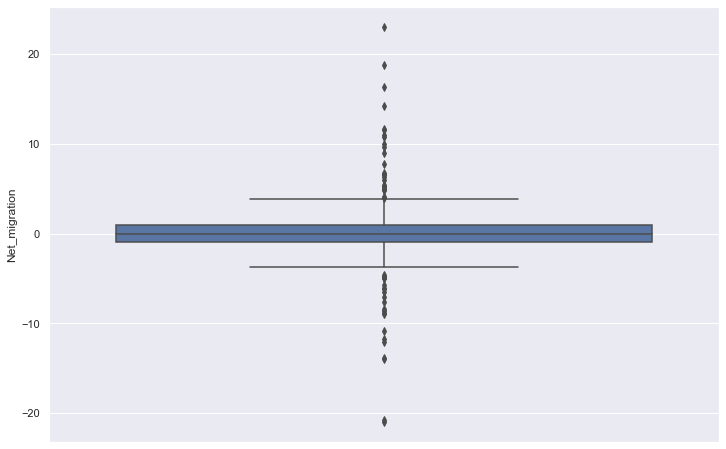

In [559]:
figsize(12,8)
sns.boxplot(net_migration_outliers, orient="vertical")

In [560]:
#primeiro, terceiro quartis e intervalo interquartil
quartil1, quartil3 = net_migration_outliers.quantile([.25, .75])
iiquartil = quartil3 - quartil1

iiquartil

1.9249999999999998

$[Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}]$

In [561]:
non_outlier_interval_iqr = [quartil1 - 1.5 * iiquartil, quartil3 + 1.5 * iiquartil]

non_outlier_interval_iqr

[-3.8149999999999995, 3.885]

In [562]:
below_outliers_iqr = net_migration_outliers[net_migration_outliers < non_outlier_interval_iqr[0]]
above_outliers_iqr = net_migration_outliers[net_migration_outliers > non_outlier_interval_iqr[1]]

print(f"Total de observacoes: {len(net_migration_outliers)} " +
        f"\nTotal de outliers: {len(below_outliers_iqr) + len(above_outliers_iqr)} " +
        f"\nPercentual de outliers: {(len(below_outliers_iqr) + len(above_outliers_iqr))/len(net_migration_outliers)} " +
        f"\nPrimeiros 5 outiliers abaixo do intervalo: \n{below_outliers_iqr.head()}" +
        f"\nPrimeiros 5 outiliers acima do intervalo: \n{above_outliers_iqr.head()}")

Total de observacoes: 227 
Total de outliers: 50 
Percentual de outliers: 0.22026431718061673 
Primeiros 5 outiliers abaixo do intervalo: 
1     -4.93
3    -20.71
7     -6.15
9     -6.47
13    -4.90
Name: Net_migration, dtype: float64
Primeiros 5 outiliers acima do intervalo: 
0     23.06
4      6.60
6     10.76
11     3.98
28    10.01
Name: Net_migration, dtype: float64


In [563]:
def q5():
    # Retorne aqui o resultado da questão 4.
    #Como temos 22% de outliers, precisaria de melhor analise para decidir como tratar.
    is_removed = False
    return (len(below_outliers_iqr), len(above_outliers_iqr), is_removed)

In [564]:
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [565]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroups = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)


In [566]:
#Temos um corpus com 1773 documentos
len(newsgroups.data)

1773

In [567]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
count_vectorizer = CountVectorizer()
newsgroups_counts = count_vectorizer.fit_transform(newsgroups.data)

In [568]:
#Indice da palavra phone
word_phone_idx = count_vectorizer.vocabulary_.get("phone")

#Ocorrencias em cada doc da palavra phone
word_phone_in_docs = newsgroups_counts[:-1,word_phone_idx].toarray()


In [569]:
def q6():
    # Retorne aqui o resultado da questão 4.
    return int(word_phone_in_docs.sum())

In [570]:
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [571]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html?highlight=tfidfvectorizer#sklearn.feature_extraction.text.TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(newsgroups.data)

newsgroups_tfidf_vectorized = tfidf_vectorizer.transform(newsgroups.data)

In [572]:
newsgroups_tfidf_vectorized.shape

(1773, 27335)

In [573]:
phone_tfidf = newsgroups_tfidf_vectorized[:, word_phone_idx].toarray()
phone_tfidf[phone_tfidf > 0]

array([0.04775188, 0.00387763, 0.07723967, 0.00724607, 0.04162627,
       0.06186971, 0.0350805 , 0.0835253 , 0.13012646, 0.05044347,
       0.01452529, 0.05122927, 0.04225538, 0.06304736, 0.11814736,
       0.05252885, 0.03815937, 0.1088122 , 0.02752203, 0.06703449,
       0.12029719, 0.04350333, 0.0384643 , 0.04996341, 0.05317607,
       0.04728803, 0.03437362, 0.00174801, 0.04529911, 0.03531909,
       0.04878507, 0.05004579, 0.04873896, 0.02394753, 0.05963916,
       0.04922375, 0.04814832, 0.06085037, 0.01869935, 0.0717038 ,
       0.19349199, 0.10752487, 0.08157105, 0.05032966, 0.17174743,
       0.03065641, 0.04072631, 0.05924823, 0.05221795, 0.02150047,
       0.03487459, 0.13401643, 0.05659139, 0.03827344, 0.13871399,
       0.04986374, 0.03747078, 0.08472028, 0.05398709, 0.04785823,
       0.06121596, 0.02328826, 0.00961329, 0.16946099, 0.06539912,
       0.19345873, 0.03516577, 0.02475824, 0.06148624, 0.03533376,
       0.06144452, 0.05392415, 0.0788657 , 0.04591934, 0.06057

In [574]:
pd.DataFrame(phone_tfidf, columns=[(tfidf_vectorizer.get_feature_names())[word_phone_idx]])

,phone
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1768,0.0
1769,0.0
1770,0.0
1771,0.0


In [575]:
def q7():
    # Retorne aqui o resultado da questão 4.
    return float(round(phone_tfidf.sum(),3))

In [576]:
q7()

8.888